# Feature Engineering

Notebook supporting the [**Do we know our data, as good as we know our tools** talk](https://devoxxuk19.confinabox.com/talk/VEM-8021/Do_we_know_our_data_as_good_as_we_know_our_tools%3F) at [Devoxx UK 2019](http://twitter.com/@DevoxxUK).

The contents of the notebook is inspired by many sources.


### High-level steps covered:

- Find hidden information
  - feature extraction
  - applying statistical functions
  - apply physics functions
- Deal with too much data
  - dimensionality reduction
  - feature selection
- Statistical Inference 


### Resources

- [Basic Feature Engineering With Time Series Data in Python](http://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/)
- [Zillow Prize - EDA, Data Cleaning & Feature Engineering](https://www.kaggle.com/lauracozma/eda-data-cleaning-feature-engineering)
- [Feature-wise transformations](https://distill.pub/2018/feature-wise-transformations)
- [tsfresh - tsfresh is used to to extract characteristics from time series](https://tsfresh.readthedocs.io/en/latest/text/introduction.html)
- [featuretools - an open source python framework for automated feature engineering](https://github.com/featuretools/featuretools/)
- [Synthetic features and outliers notebook](https://colab.research.google.com/notebooks/mlcc/synthetic_features_and_outliers.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=syntheticfeatures-colab&hl=en#scrollTo=jnKgkN5fHbGy)
- [Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)

Please refer to the [Slides](http://bit.ly/do-we-know-our-data) for the step here after.

#### Load Your Data

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
names = ["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"]
data = pd.read_csv(url, names=names)

!rm  housing.names || true
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names
print("Names and descriptions of the fields of the Boston Housing dataset can be found at")
print("https://github.com/jbrownlee/Datasets/blob/master/housing.names")
print("")
!cat housing.names

--2019-04-20 12:37:16--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2080 (2.0K) [text/plain]
Saving to: ‘housing.names’

housing.names       100%[===================>]   2.03K  --.-KB/s    in 0s      

2019-04-20 12:37:16 (18.0 MB/s) - ‘housing.names’ saved [2080/2080]

Names and descriptions of the fields of the Boston Housing dataset can be found at
https://github.com/jbrownlee/Datasets/blob/master/housing.names

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics 

let's set a baseline to evaluate our attempts to improve our model

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def evaluateModelOnDataset(data):
    X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'medv'].values, data["medv"].values, test_size=0.33, random_state=42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

def evaluateModelOnTrainingAndTestSets(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)
evaluateModelOnDataset(data)

0.7261570836552489

### Find hidden information

- feature extraction
- applying statistical functions
- apply physics functions 

#### Feature extraction

- group together sparse classes
- create new calculated columns, for e.g. extracting weekday from date
- generate relevant labels with the help of results from clustering



####  Applying statistical functions
- convert to absolute values
- apply root mean square
- use logarithmic functions
- applying rolling mean / stddev / min / max 

And manage precision of the data!


We observed earlier than there was a correlation between lstat and medv.

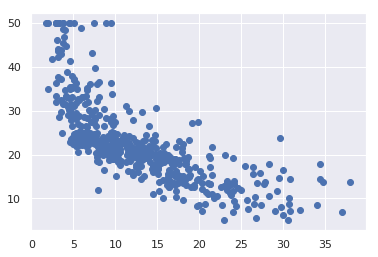

In [16]:
plt.scatter(data["lstat"], data["medv"], marker='o')
plt.show()

It seems to be an exponential function.

We apply logarithm function to it to convert it into a linear correlation and make it easier for our model to pick the correlation.

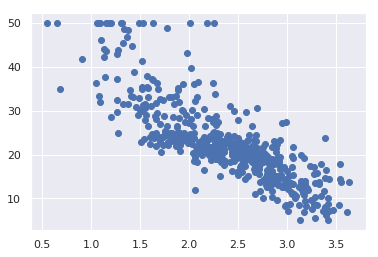

In [17]:
data_engineered=data.copy()
data_engineered["lstat"]=np.log(data_engineered["lstat"])
plt.scatter(data_engineered["lstat"], data_engineered["medv"], marker='o')
plt.show()

In [18]:
print("previous accuracy: %f" % evaluateModelOnDataset(data))
print("new accuracy: %f" % evaluateModelOnDataset(data_engineered))


previous accuracy: 0.726157
new accuracy: 0.772251


#### Apply physics functions
- Energy
- Energy rate
- Short Term Average / Long term Avg
- Kurtosis
- FFT (Fast Fourier Transform)


#### Feature scaling
- Standardization
- Normalization
- map to uniform / gaussian distribution


In [96]:
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'medv'].values, data["medv"].values, test_size=0.33, random_state=42)
X_train_normalized=preprocessing.normalize(X_train)
X_test_normalized=preprocessing.normalize(X_test)
X_train_standardized=preprocessing.scale(X_train)
X_test_standardized=preprocessing.scale(X_test)

In [102]:
print("baseline accuracy: %f" % evaluateModelOnTrainingAndTestSets(X_train, X_test, y_train, y_test))
print("new accuracy for standardized data: %f" % evaluateModelOnTrainingAndTestSets(X_train_standardized, X_test_standardized, y_train, y_test))
print("new accuracy for normalized data: %f" % evaluateModelOnTrainingAndTestSets(X_train_normalized, X_test_normalized, y_train, y_test))

baseline accuracy: 0.726157
new accuracy for standardized data: 0.704179
new accuracy for normalized data: 0.739282


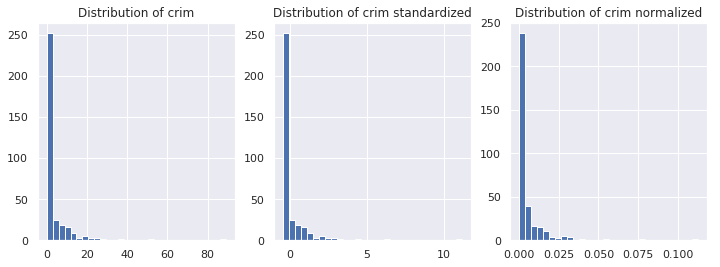

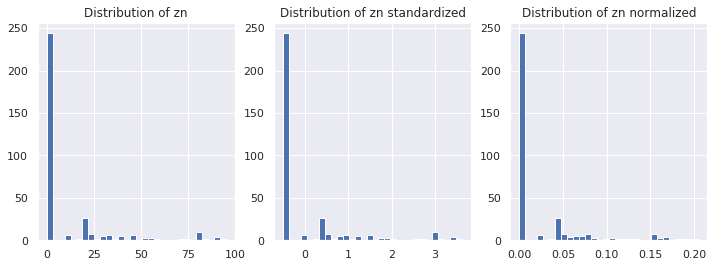

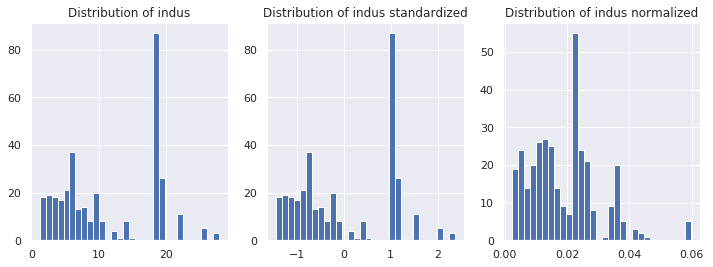

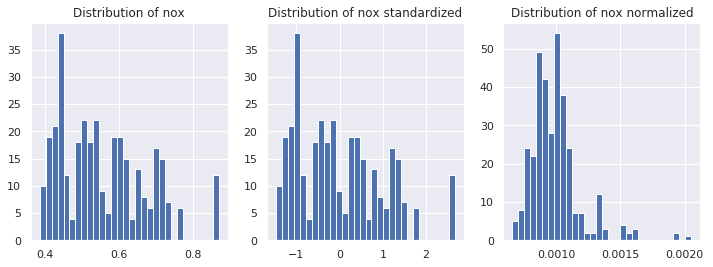

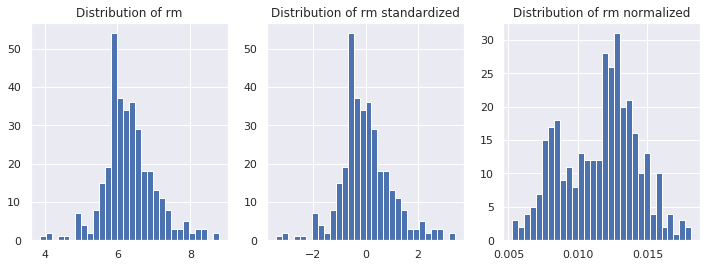

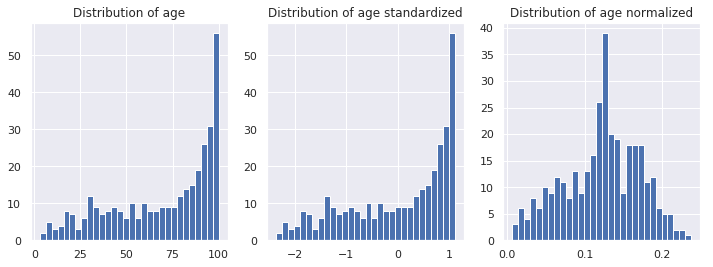

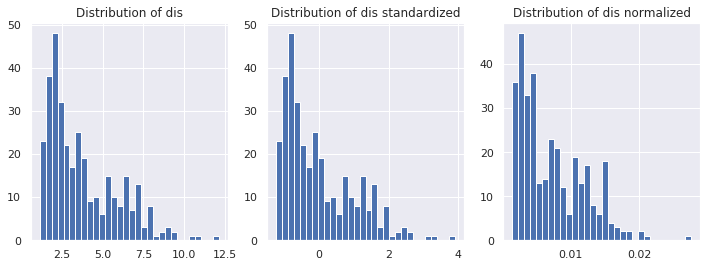

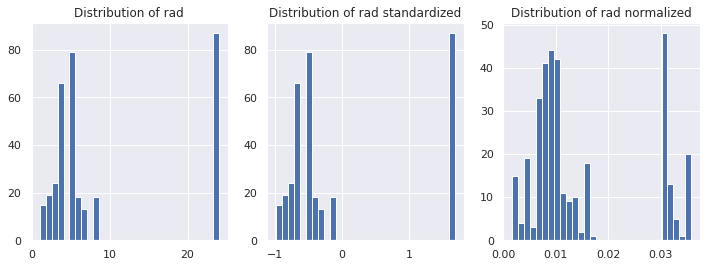

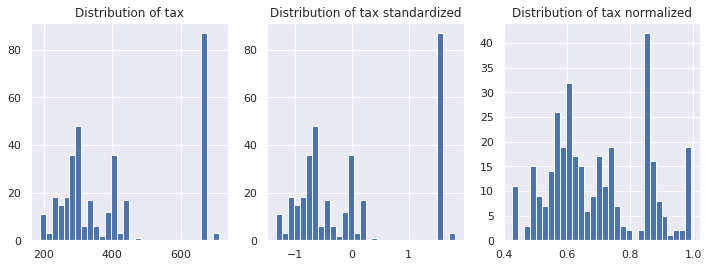

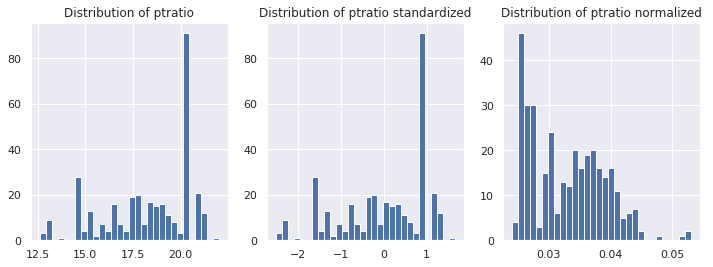

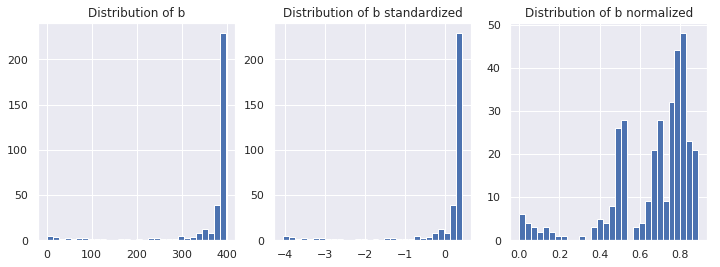

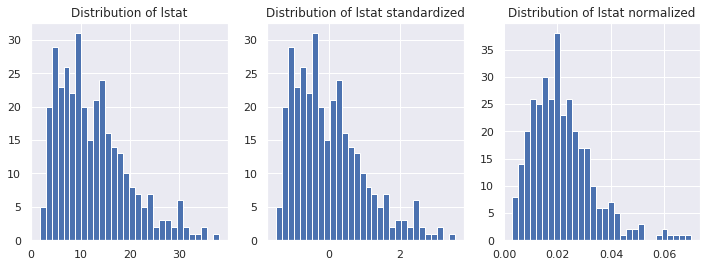

In [100]:
# we loop through all the columns
for index,col in enumerate(data.columns): 
    if(col not in ['medv','chas']):
        # and for each column we create space for one row with 2 charts 
        f, axes = plt.subplots(1, 3, figsize=(12, 4))

        axes[0].hist(X_train[:, index],bins = 30)
        axes[0].set_title('Distribution of '+ col)

        axes[1].hist(X_train_standardized[:, index],bins = 30)
        axes[1].set_title('Distribution of '+ col + ' standardized')

        axes[2].hist(X_train_normalized[:, index],bins = 30)
        axes[2].set_title('Distribution of '+ col + ' normalized')
        # we then use this to command to display the charts
        plt.show()

### Deal with too many features / too much data

- dimensionality reduction
- feature selection

#### Dimensionality reduction

- Factorisation 
    - PCA Principal Component Analysis
- ICA 
Independent Component Analysis
- t-SNE 
t-Distributed Stochastic Neighbour Embedding
- UMAP 
Uniform Manifold Approximation and Projection

#### Feature selection
Manual
- Filter out features which are highly correlated.
- Plot multi scatter chart 
- Use correlation table 
- (might need to remove features which were used for extraction)

#### Correlation Between Attributes

Correlation refers to the relationship between two variables and how they may or may not change together.

#### Feature selection
Manual
- Filter out features which are highly correlated.
- Plot multi scatter chart 
- Use correlation table 
- (might need to remove features which were used for extraction)

          crim     zn  indus   chas    nox     rm    age    dis    rad    tax  ptratio      b  \
crim     1.000 -0.200  0.407 -0.056  0.421 -0.219  0.353 -0.380  0.626  0.583    0.290 -0.385   
zn      -0.200  1.000 -0.534 -0.043 -0.517  0.312 -0.570  0.664 -0.312 -0.315   -0.392  0.176   
indus    0.407 -0.534  1.000  0.063  0.764 -0.392  0.645 -0.708  0.595  0.721    0.383 -0.357   
chas    -0.056 -0.043  0.063  1.000  0.091  0.091  0.087 -0.099 -0.007 -0.036   -0.122  0.049   
nox      0.421 -0.517  0.764  0.091  1.000 -0.302  0.731 -0.769  0.611  0.668    0.189 -0.380   
rm      -0.219  0.312 -0.392  0.091 -0.302  1.000 -0.240  0.205 -0.210 -0.292   -0.356  0.128   
age      0.353 -0.570  0.645  0.087  0.731 -0.240  1.000 -0.748  0.456  0.506    0.262 -0.274   
dis     -0.380  0.664 -0.708 -0.099 -0.769  0.205 -0.748  1.000 -0.495 -0.534   -0.232  0.292   
rad      0.626 -0.312  0.595 -0.007  0.611 -0.210  0.456 -0.495  1.000  0.910    0.465 -0.444   
tax      0.583 -0.315  0.721 -

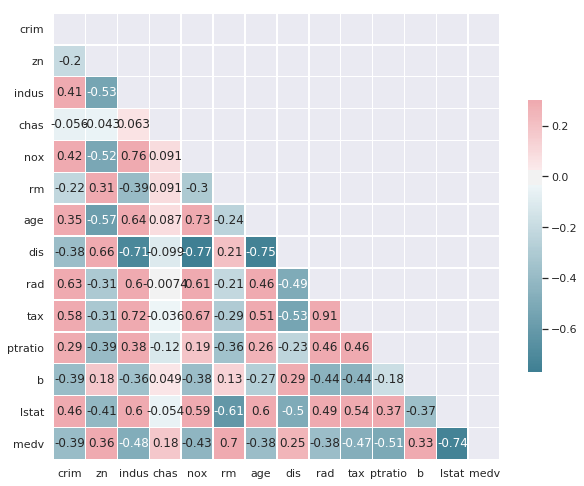

In [20]:
# Pairwise Pearson correlations
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = data.corr(method='pearson')
print(correlations)
print()
print("A correlation of -1 or 1 shows a full negative (inverse) or positive (direct) correlation respectively.") 
print("A value of 0 shows no correlation at all.")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
# correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
# sns.heatmap(correlations, annot=True,mask=mask, cmap=cmap)

The features with high correlations between themselves should not be used together in case of some models (linear regression): dis and nox (-0.77), tax and rad (0.91)

In [21]:
prev_accuracy =evaluateModelOnDataset(data[["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"]])
print("baseline: %f" % prev_accuracy)
for feature in ["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat"]:
    new_accuracy=evaluateModelOnDataset(data.loc[:, data.columns != feature])
    if new_accuracy > prev_accuracy:
        print("accuracy without %s: %f            :)" % (feature, new_accuracy))
    else: 
        print("accuracy without %s: %f" % (feature, new_accuracy))


baseline: 0.726157
accuracy without crim: 0.724202
accuracy without zn: 0.714156
accuracy without indus: 0.727770            :)
accuracy without chas: 0.725516
accuracy without nox: 0.708281
accuracy without rm: 0.686267
accuracy without age: 0.729383            :)
accuracy without dis: 0.689851
accuracy without rad: 0.704817
accuracy without tax: 0.714122
accuracy without ptratio: 0.693525
accuracy without b: 0.729646            :)
accuracy without lstat: 0.687862


Programmatically
- Tree based feature selection
- Use feature importance from XGBoost or RandomForest


accuracy of randomForest on full dataset: 0.977969


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/jeremie/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


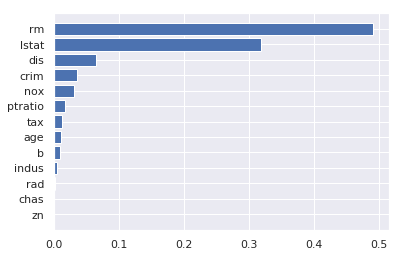

In [22]:
from sklearn.ensemble import RandomForestRegressor


labels=data.loc[:, data.columns != 'medv'].columns.values

model = RandomForestRegressor();
model.fit(data[labels],data["medv"].values);
print("accuracy of randomForest on full dataset: %f" % model.score(data[labels],data["medv"].values));

df_features=pd.DataFrame()
df_features["feature"]=labels
df_features["importance"]=model.feature_importances_
df_features.sort_values(by="importance",inplace=True)

y_pos = np.arange(len(df_features))
plt.barh(y_pos,df_features["importance"])
plt.yticks(y_pos,df_features["feature"])
plt.show()

In [23]:
print("baseline: %f" % evaluateModelOnDataset(data[["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"]]))
print("with top 3 features: %f" % evaluateModelOnDataset(data[["lstat","rm","dis","medv"]]))
print("with last 2 features removed: %f" % evaluateModelOnDataset(data.loc[:, (data.columns != 'chas')&(data.columns != 'zn')]))


baseline: 0.726157
with top 3 features: 0.624183
with last 2 features removed: 0.714106


#### Try again using normalized data

accuracy of randomForest on test dataset: 0.836439


/home/jeremie/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


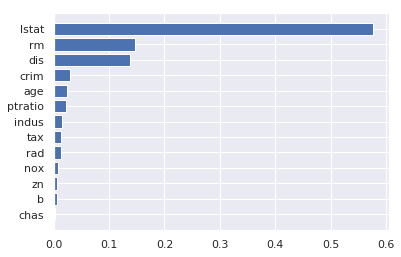

In [105]:
from sklearn.ensemble import RandomForestRegressor


labels=data.loc[:, data.columns != 'medv'].columns.values

model = RandomForestRegressor();
model.fit(X_train_normalized,y_train);
print("accuracy of randomForest on test dataset: %f" % model.score(X_test_normalized,y_test));

df_features=pd.DataFrame()
df_features["feature"]=labels
df_features["importance"]=model.feature_importances_
df_features.sort_values(by="importance",inplace=True)

y_pos = np.arange(len(df_features))
plt.barh(y_pos,df_features["importance"])
plt.yticks(y_pos,df_features["feature"])
plt.show()

In [111]:
np.where(data.columns.isin(["lstat","rm","dis"]))
# data.columns.values.index('lstat')

(array([ 5,  7, 12]),)

In [114]:
print("baseline: %f" % evaluateModelOnTrainingAndTestSets(X_train_normalized, X_test_normalized, y_train, y_test))
print("with top 3 features: %f" % evaluateModelOnTrainingAndTestSets(X_train_normalized[:,[5,7,12]], X_test_normalized[:,[5,7,12]], y_train, y_test))

baseline: 0.739282
with top 3 features: 0.670897


### Statistical Inference

- [Understanding statistical inference]() [video]
- [Four ideas of Statistical Inference](http://www.bristol.ac.uk/medical-school/media/rms/red/4_ideas_of_statistical_inference.html)
- [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) [book]
- [Statistical Inference](https://www.coursera.org/learn/statistical-inference) [course]


### Please refer to the [Slides](http://bit.ly/do-you-know-your-data) for the step here after.